# Implementation Practice.2-2
## Binary Classification with Sigmoid Function

Practice2-1에서 linear regression model을 이용하여 binary classification을 할 때 어떤 문제점이 있는지 알아봤다.

그러면 이번 Practice2-2에서는 Practice2-1의 문제를 해결하는 sigmoid function에 대해 알아보도록 하자.

***
## Sigmoid Function

먼저 isgmoid function은 다음과 같은 식으로 표현된다.
<center>
$\sigma(x) = \frac{1}{1 + \exp^{-x}}$
</center>
이 sigmoid function을 numpy를 이용해 구현해보자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x_range = np.linspace(-10, 10, 1000)
##### Your Code(Sigmoid Function/Start) #####
y = 1/(1+np.exp(-x_range))
##### Your Code(Sigmoid Function/Start) #####
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(x_range, y)
ax.grid()

**Expected Output:** <br>
<img src="./images/2_2_image1.png">

**Q1) Sigmoid function의 수학적 특성들을 분석하시오**

***
## Dataset Generation

이 sigmoid의 특성을 이용하기 위한 dataset을 만들어보자. 이 dataset은 practice2-1에서 사용한 outlier가 있는 dataset을 불러오면 된다.

study_hour_P.shape: (70,)
result_P.shape: (70,)


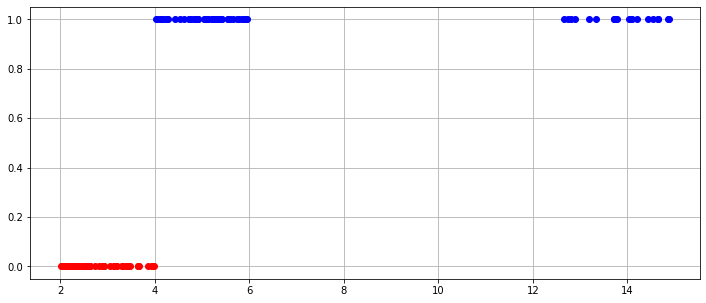

In [2]:
##### Your Code(Dataset Load/Start) #####
# Pass/No Pass 학생을 각각 50명씩 만들도록 세팅
n_P, n_NP = 50, 50
# 학생들의 최소/최대 공부시간을 hour_m, hour_M으로 만들고 decision boundary를 hour_b로 만듦
# 즉, NP학생들은 2~4시간 공부시간을 가지고 P학생들은 4~6시간의 공부시간을 가짐
hour_m, hour_b, hour_M = 2, 4, 6

##### Your Code(Dataset Generation/Start) #####
study_hour_P = np.random.uniform(low = hour_b, high = hour_M , size = n_P)
study_hour_NP = np.random.uniform(low = hour_m, high = hour_b, size = n_NP)

# P, NP학생들의 y값들은 각각 1, 0으로 만들어줌
result_P = np.ones_like(study_hour_P)
result_NP = np.zeros_like(study_hour_NP)
##### Your Code(Dataset Generation/End) #####
n_out = 20
hour_out_m, hour_out_M = 12, 15
##### Your Code(Adding Outliers/Start) #####
study_hour_outlier = np.random.uniform(low = hour_out_m, high = hour_out_M, size = (n_out,))
result_outlier = np.ones_like(study_hour_outlier)

study_hour_P = np.append(study_hour_P, study_hour_outlier)
result_P = np.append(result_P, result_outlier)

x_data = np.hstack([study_hour_P,study_hour_NP])
y_data = np.hstack([result_P,result_NP])
##### Your Code(Dataset Load/Start) #####

print("study_hour_P.shape:",study_hour_P.shape)
print("result_P.shape:", result_P.shape)

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_data[:n_P + n_out], y_data[:n_P + n_out], 'bo')
ax.plot(x_data[n_P + n_out:], y_data[n_P + n_out:], 'ro')
ax.grid()

**Expected Output:** <br>
study_hour_P.shape: (70,) <br>
result_P.shape: (70,) <br>
<img src="./images/2_2_image2.png">

***
## Node Implemenation

위의 sigmoid function은 기존 linear regression model에 추가되는 것이기 때문에 기존의 node들을 그대로 이요하면서 새로 sigmoid_node()를 만들어주면 된다.

먼저 기존 node들을 불러오도록 하자.

In [3]:
##### Your Code(Node Loading/Start) #####
class plus_node():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x + y
        return self.z
    
    def backward(self, dL):
        return dL, dL
    
class minus_node():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x - y
        return self.z
    
    def backward(self, dL):
        return dL, -1*dL
    
class mul_node():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x*y
        return self.z
    def backward(self, dL):
        return self.y*dL, self.x*dL

class square_node():
    def __init__(self):
        self.x, self.z = None, None
    
    def forward(self, x):
        self.x, self.z = x, x*x
        return self.z
    
    def backward(self, dL):
        return 2*self.x*dL
        

class cost_node():
    def __init__(self):
        self.x, self.z = None, None
    
    def forward(self, x):
        self.x = x
        self.z = np.mean(self.x)
        return self.z
    def backward(self):
        return 1/len(self.x)*np.ones(shape = (self.x.shape))
    
##### Your Code(Node Loading/End) #####

그리고 추가적으로 sigmoid_node()를 만들어준다. 이때 sigmoid의 forward는 위의 Sigmoid Function part에서의 식을 이용하면 되고, backward는

<center>
$\frac{\partial \sigma{(x)}}{\partial x} = \sigma{(x)}(1- \sigma{(x)})$
</center>
의 식을 이용하면 된다.

In [4]:
class sigmoid_node():
    def __init__(self):
        self.x = None
        self.z = None
        
    def forward(self, x):
        self.x = x
        self.z = 1/(1+np.exp(-self.x))
        return self.z
    
    def backward(self, dL):
        return self.z * (1-self.z) * dL
    
test_sigmoid = sigmoid_node()
test_x = np.array([1, 2, 3, 4, 5])
print(test_sigmoid.forward(test_x))
print(test_sigmoid.backward(1))

[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]
[0.19661193 0.10499359 0.04517666 0.01766271 0.00664806]


**Expected Output:** <br>
[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715] <br>
[0.19661193 0.10499359 0.04517666 0.01766271 0.00664806]

***
## Model Implementation

위의 node들을 이용해서 sigmoid를 추가한 다음과 같은 모델을 만들어보자.

<img src="./images/2_2_image3.png">

위에서 알 수 있듯이, 추가된 node는 sigmoid_node밖에 없고, 나머지는 Practice2-1에서와 동일하다.

In [5]:
##### Your Code(Model Implementation/Start) #####
Z1_node = mul_node()
Z2_node = plus_node()
Z3_node = sigmoid_node()
Z4_node = minus_node()
L_node = square_node()
J_node = cost_node()
##### Your Code(Model Implementation/Start) #####

***
## Learning Preparation
그 후에 학습에 필요한 값들을 정의하고, 결과를 확인하기 위한 list들을 초기화해준다.

In [6]:
theta1, theta0 = 0, 0# theta1, theta0 설정
lr = 0.03# learning rate 설정
epochs = 10000#총 epoch 설정

cost_list = []
theta1_list, theta0_list = [], []

***
## Learning Process

학습에서 달라진 점도 Z4_node가 하나 추가된 것밖에 없다.

In [7]:
for i in range(epochs):
    ##### Your Code(Learning Process/Start) #####
    Z1 = Z1_node.forward(theta1, x_data)
    Z2 = Z2_node.forward(Z1, theta0)
    Z3 = Z3_node.forward(Z2)
    Z4 = Z4_node.forward(y_data,Z3)
    L = L_node.forward(Z4)
    J = J_node.forward(L)
    
    dL = J_node.backward()
    dZ4 = L_node.backward(dL)
    dY, dZ3 = Z4_node.backward(dZ4)
    dZ2 = Z3_node.backward(dZ3)
    dZ1, dTheta0 = Z2_node.backward(dZ2)
    dTheta1, dX = Z1_node.backward(dZ1)
    ##### Your Code(Learning Process/End) #####
    
    theta1 = theta1 - lr*np.sum(dTheta1)
    theta0 = theta0 - lr*np.sum(dTheta0)
    
    cost_list.append(J)
    theta1_list.append(theta1)
    theta0_list.append(theta0)

***
## Result Visualization

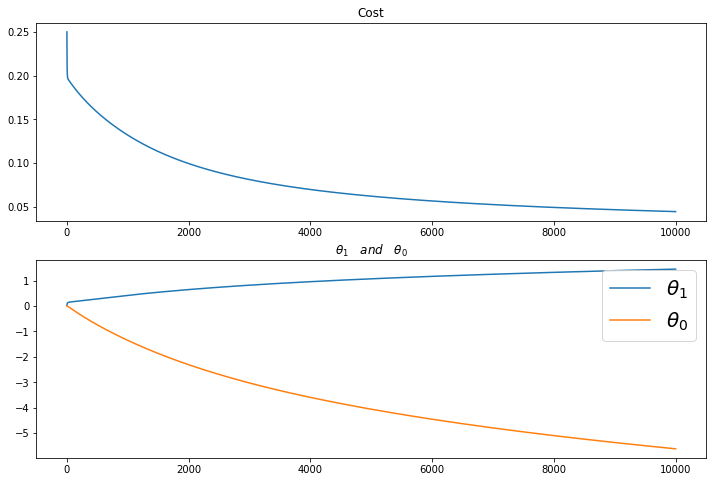

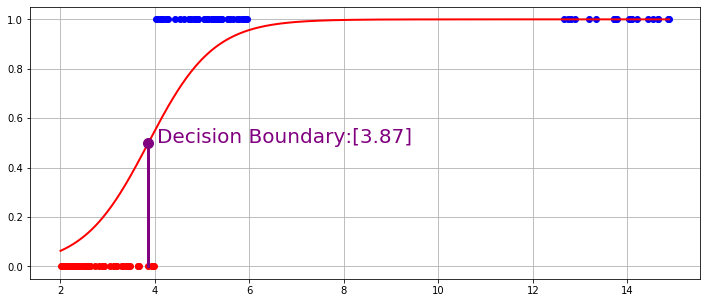

In [8]:
fig, ax = plt.subplots(2, 1, figsize = (12, 8))
ax[0].set_title("Cost")
ax[1].set_title(r'$\theta_{1} \quad and \quad \theta_{0}$')
ax[0].plot(cost_list)
ax[1].plot(theta1_list, label = r'$\theta_{1}$')
ax[1].plot(theta0_list, label = r'$\theta_{0}$')
ax[1].legend(loc = 'upper right', fontsize = 20)

x_min, x_max = x_data.min(), x_data.max()
y_min, y_max = Z3_node.forward(x_min*theta1 + theta0), Z3_node.forward(x_max*theta1 + theta0)
x_range = np.linspace(x_min, x_max, 1000)
y_range = Z3_node.forward(x_range*theta1 + theta0)
y_d_idx = np.where(np.abs(y_range - 0.5) == np.min(np.abs(y_range - 0.5)))
x_d_val = x_range[y_d_idx]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_data[:n_P + n_out], y_data[:n_P + n_out], 'bo')
ax.plot(x_data[n_P + n_out:], y_data[n_P + n_out:], 'ro')
ax.plot(x_range, y_range, 'r', linewidth = 2)
ax.plot([x_range[y_d_idx], x_range[y_d_idx]], [0, y_range[y_d_idx]], 'purple', linewidth = 3)
ax.plot(x_range[y_d_idx], y_range[y_d_idx], 'purple', marker = 'o', markersize = 10)
ax.text(x_range[y_d_idx]*1.05, y_range[y_d_idx],
        s = "Decision Boundary:" + str(np.round(x_range[y_d_idx], 2)),
       fontdict = {'color':  'purple', 'fontsize': 20})
ax.grid()

**Expected Output:** <br>
<img src="./images/2_2_image4.png">
<img src="./images/2_2_image5.png">

**Q2) 위와 같이 sigmoid function이 outlier의 영향을 덜 받는 이유를 수학적으로 분석하시오.**